In [1]:
import numpy as np
import cvxpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import euclidean

# Séances 2 et 3 : optimisation discrète et optimisation multi-objectif

###  2.1 Rangement d’objets (optimisation combinatoire)

_1) Question préliminaire_

_2)_

Load datasets

In [2]:
position_casier = pd.read_table("RangerObjets/PositionCasiers.txt")
position_objet = pd.read_table("RangerObjets/PositionObjets.txt")

print(position_casier.shape)
print(position_casier.shape)

position_casier.sample(n=3)

(15, 2)
(15, 2)


,x,y
12,0.357143,0
2,-0.357143,0
4,-0.214286,0


In [3]:
position_casier = position_casier.values
position_objet = position_objet.values

In [121]:
n = len(position_casier)
distance = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        distance[i,j] = euclidean(position_objet[i], position_casier[j])
distance = distance.flatten()

In [28]:
# X = cvxpy.Variable(n**2, boolean=True)
# constraints_i = [X[i*n:(i+1)*n]*np.ones(n) == 1 for i in range(n)]
# constraints_j = [X[j:n**2:n]*np.ones(n) == 1 for j in range(n)]
# constraints = constraints_i + constraints_j

# total_distance = X * distance

In [122]:
X = cvxpy.Variable((n,n), boolean=True)
constraints_i = [X[i,:]*np.ones(n) == 1 for i in range(n)]
constraints_j = [X[:,j]*np.ones(n) == 1 for j in range(n)]
constraints = constraints_i + constraints_j

total_distance = X.flatten() * distance

In [123]:
objet_casier_pb = cvxpy.Problem(cvxpy.Minimize(total_distance), constraints)

In [124]:
objet_casier_pb.solve(solver=cvxpy.ECOS_BB)

15.377627810052127

In [41]:
def mat_to_bool(mat, eps=1e-4):
    n,p = mat.shape
    for i in range(n):
        for j in range(p):
            if mat[i,j] < eps:
                mat[i,j] = 0
            else :
                mat[i,j] = 1
    return mat

In [125]:
X_value = mat_to_bool(X.value)

In [126]:
X_value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.

_3)_

In [157]:
contrainte_objet_1_2 = [X[i,0]==X[i+1,1] for i in range(n-1)]

In [158]:
constraints_new_1_2 = constraints + contrainte_objet_1_2

In [129]:
objet_casier_pb = cvxpy.Problem(cvxpy.Minimize(total_distance), constraints_new_1_2)
objet_casier_pb.solve(solver=cvxpy.ECOS_BB)

15.565123298218948

In [130]:
X_value = mat_to_bool(X.value)

In [131]:
X_value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

_4)_

In [156]:
len(constraints_objet_3_4)

120

In [159]:
constraints_objet_3_4 = []
for i in range(n):
    constraints_objet_3_4 += [X[i,2]+X[i+k,3] <= 1 for k in range(n-i)]

In [160]:
constraints_new_3_4 = constraints_new_1_2 + constraints_objet_3_4

In [161]:
objet_casier_pb = cvxpy.Problem(cvxpy.Minimize(total_distance), constraints_new_3_4)
objet_casier_pb.solve(solver=cvxpy.ECOS_BB)

15.956916189816255

In [162]:
X_value = mat_to_bool(X.value)

In [165]:
X_value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [179]:
labels_objets = [str(i) for i in range(10)]
labels_objets

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [269]:
def plot_objet_casier(position_objet, position_casier, attribution, figsize=(20,12)):
    n = len(position_objet)
    
    fig, ax = plt.subplots(1, figsize=figsize)
    
    labels_objets = [r"$O_{" + str(i)  + r"}$"for i in range(1, n+1)]
    plt.scatter(position_objet[:,0],position_objet[:,1] , color="tomato")

    labels_casier = [r"$B_{" + str(i)  + r"}$" for i in range(1, n+1)]
    plt.scatter(position_casier[:,0],position_casier[:,1] , color="c")
    
    for i in range(n):
        ax.annotate(labels_objets[i], (position_objet[i,0], position_objet[i,1]), fontsize=14)
        ax.annotate(labels_casier[i], (position_casier[i,0], position_casier[i,1]), fontsize=12)
        
        j = np.where(attribution[:,i]==1.)[0][0]
        plt.plot((position_casier[j,0], position_objet[i,0]), 
                 (position_casier[j,1], position_objet[i,1]),
                 '--', 
                 c='dimgrey',
                 label=r"$O_{" + str(i+1) + r"}\rightarrow B_{" + str(j+1) + r"}$")
    
    plt.legend(fontsize=12, loc='lower left')
    plt.show()

(15, 2)

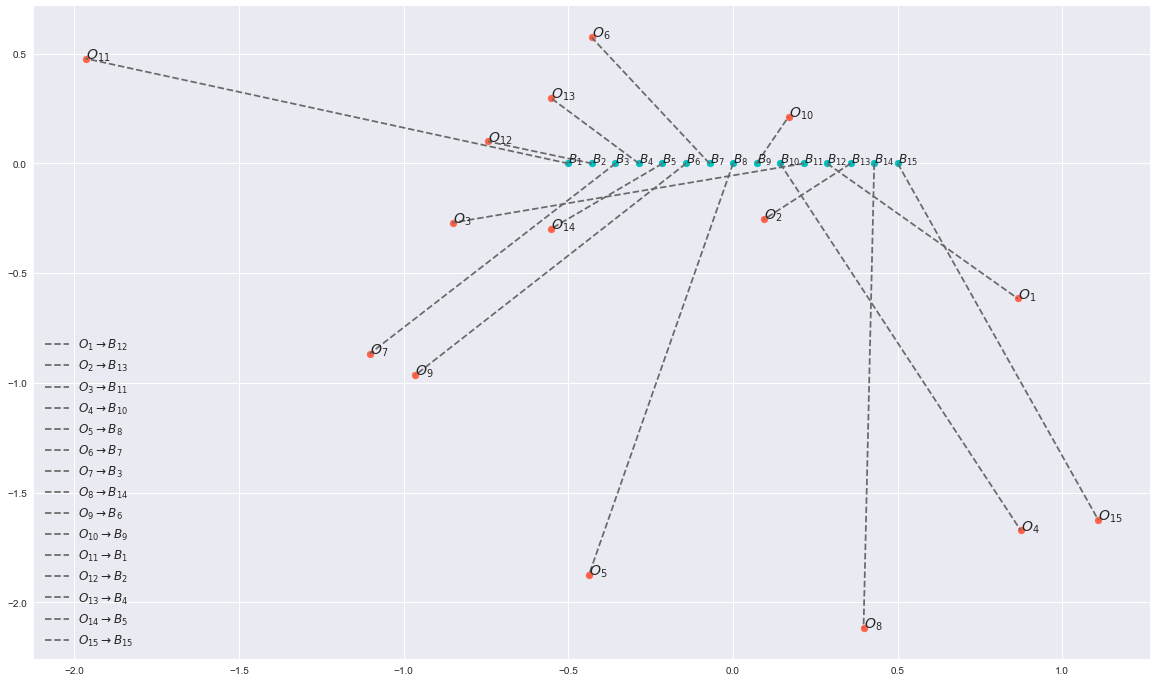

In [270]:
plot_objet_casier(position_objet, position_casier, X_value)

In [213]:
np.where(X_value[1,:]==1)[0][0]

numpy.int64

In [201]:
X_value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.